In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sns.set(style="white", color_codes=True)
df = pd.read_csv("UIDAI-ENR-DETAIL-20170308 2.csv")

<ipython-input-4-b5d5826f2753>:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UIDAI-ENR-DETAIL-20170308 2.csv")


In [ ]:
df.head()

,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440818 entries, 0 to 440817
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Registrar                          440818 non-null  object
 1   Enrolment Agency                   440818 non-null  object
 2   State                              440818 non-null  object
 3   District                           440818 non-null  object
 4   Sub District                       440818 non-null  object
 5   Pin Code                           440818 non-null  object
 6   Gender                             440818 non-null  object
 7   Age                                440818 non-null  int64 
 8   Aadhaar generated                  440818 non-null  int64 
 9   Enrolment Rejected                 440818 non-null  int64 
 10  Residents providing email          440818 non-null  int64 
 11  Residents providing mobile number  440818 non-null  

In [ ]:
state_counts=df["State"].value_counts()
state_counts

Bihar                          81776
Uttar Pradesh                  69476
West Bengal                    60485
Madhya Pradesh                 37360
Rajasthan                      28659
Gujarat                        24146
Tamil Nadu                     21196
Maharashtra                    19783
Karnataka                      15755
Kerala                         12378
Odisha                         11972
Jharkhand                       7423
Delhi                           7247
Uttarakhand                     6521
Punjab                          5888
Haryana                         5138
Chhattisgarh                    4617
Andhra Pradesh                  4540
Telangana                       3768
Mizoram                         3172
Assam                           2972
Jammu and Kashmir               1331
Himachal Pradesh                1283
Goa                              799
Tripura                          726
Arunachal Pradesh                632
Manipur                          562
N

<ipython-input-8-2d4bc101e523>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation_data, dtype=np.bool)


0.34024739265441895


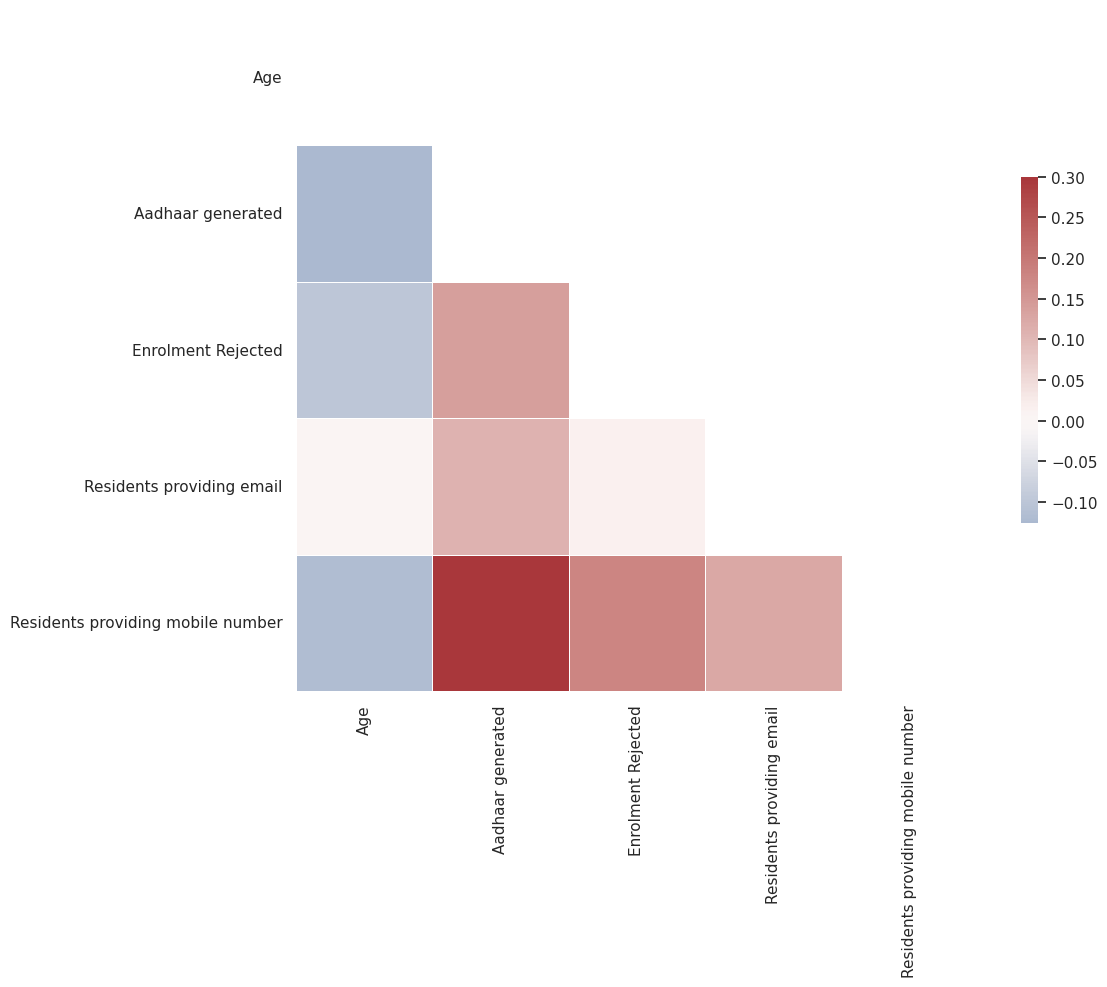

In [ ]:
start_time=time.time()
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.palette="vlag"


sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.4, cbar_kws={"shrink": .5});

end_time=time.time()
ep=end_time-start_time
print(ep)

<ipython-input-59-104855b9c80c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)


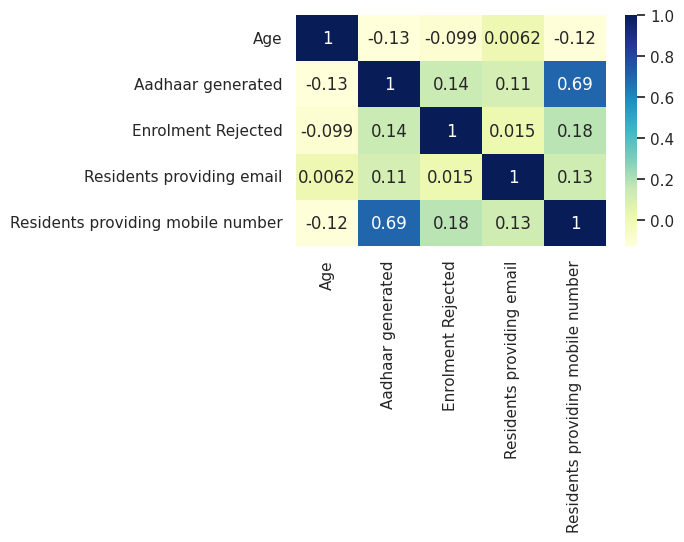

0.438601016998291


In [ ]:
start_time=time.time()
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

In [ ]:
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']
state_counts = state_counts.sort_values(by='Count',ascending=False)
top_10=state_counts.head(9)

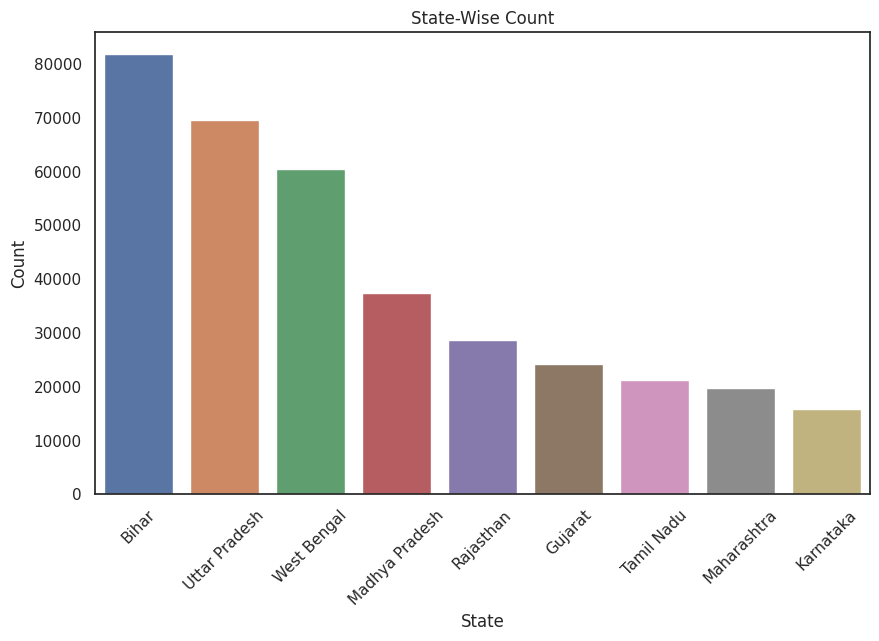

0.7153408527374268


In [ ]:
start_time=time.time()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='State', y='Count')
plt.title('State-Wise Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

<Figure size 1200x600 with 0 Axes>

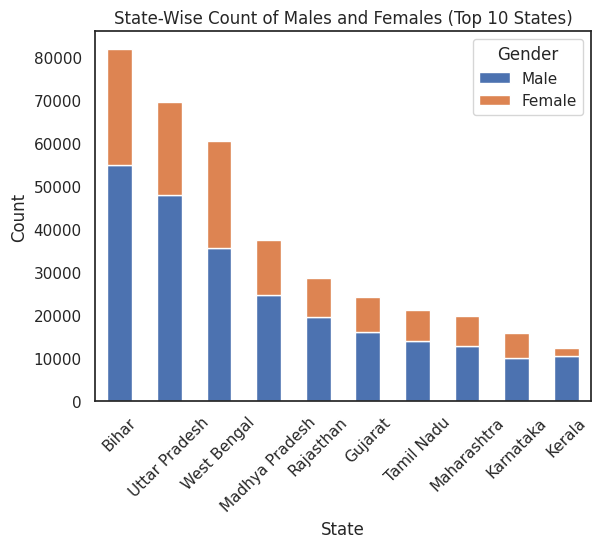

0.4888894557952881


In [ ]:
start_time=time.time()
state_gender_counts = df.groupby(['State', 'Gender']).size().unstack(fill_value=0)

state_gender_counts['Total'] = state_gender_counts['M'] + state_gender_counts['F']


top_10_states = state_gender_counts.sort_values(by='Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_states[['M', 'F']].plot(kind='bar', stacked=True)
plt.title('State-Wise Count of Males and Females (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

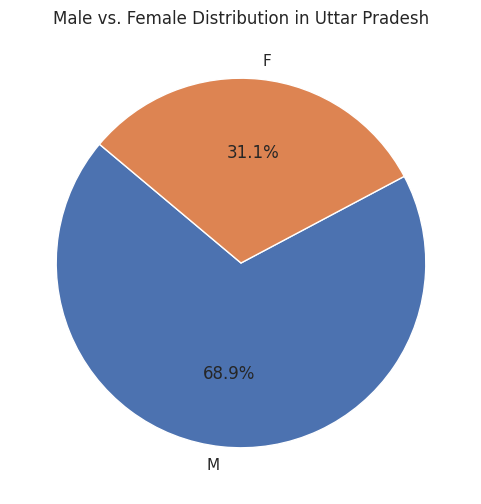

0.2698173522949219


In [ ]:
start_time=time.time()
up_data = df[df['State'] == 'Uttar Pradesh']


gender_counts = up_data['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Male vs. Female Distribution in Uttar Pradesh')
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

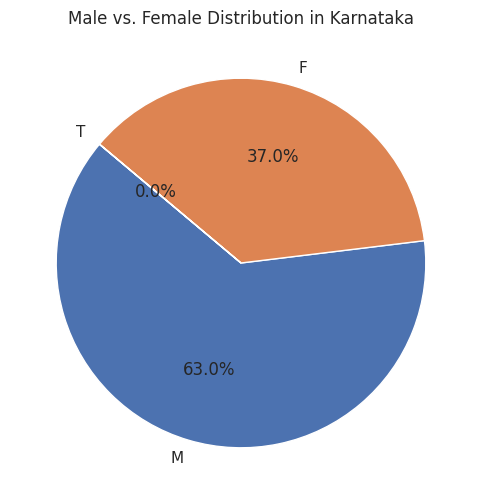

0.17864394187927246


In [ ]:
start_time=time.time()
up_data = df[df['State'] == 'Karnataka']
gender_counts = up_data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Male vs. Female Distribution in Karnataka')
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

In [ ]:
karnataka_districts = df[df['State'] == 'Karnataka']['District'].unique()

print("Districts in Karnataka:", karnataka_districts)

Districts in Karnataka: ['Bagalkot' 'Ballari' 'Bangalore Rural' 'Belagavi' 'Bengaluru' 'Bidar'
 'Chamrajanagar' 'Chikkaballapur' 'Chikkamagaluru' 'Chitradurga'
 'Dakshina Kannada' 'Davangere' 'Dharwad' 'Gadag' 'Hassan' 'Haveri'
 'Kalaburagi' 'Kodagu' 'Kolar' 'Koppal' 'Mandya' 'Mysuru' 'Raichur'
 'Ramanagar' 'Shivamogga' 'Tumakuru' 'Udupi' 'Uttara Kannada' 'Vijayapura'
 'Yadgir']


In [ ]:
karnataka_data = df[df['State'] == 'Karnataka']
district_counts = karnataka_data['District'].value_counts()
print("District-wise Data Counts in Karnataka:")
print(district_counts)

District-wise Data Counts in Karnataka:
Bengaluru           3508
Belagavi            1547
Kalaburagi           987
Vijayapura           810
Raichur              775
Dakshina Kannada     593
Dharwad              546
Ballari              527
Davangere            512
Mysuru               478
Bagalkot             474
Bidar                452
Tumakuru             432
Kolar                364
Uttara Kannada       356
Chitradurga          355
Haveri               337
Chikkaballapur       311
Mandya               297
Shivamogga           295
Yadgir               280
Koppal               252
Gadag                209
Hassan               206
Chikkamagaluru       188
Bangalore Rural      173
Ramanagar            157
Udupi                146
Chamrajanagar        116
Kodagu                72
Name: District, dtype: int64


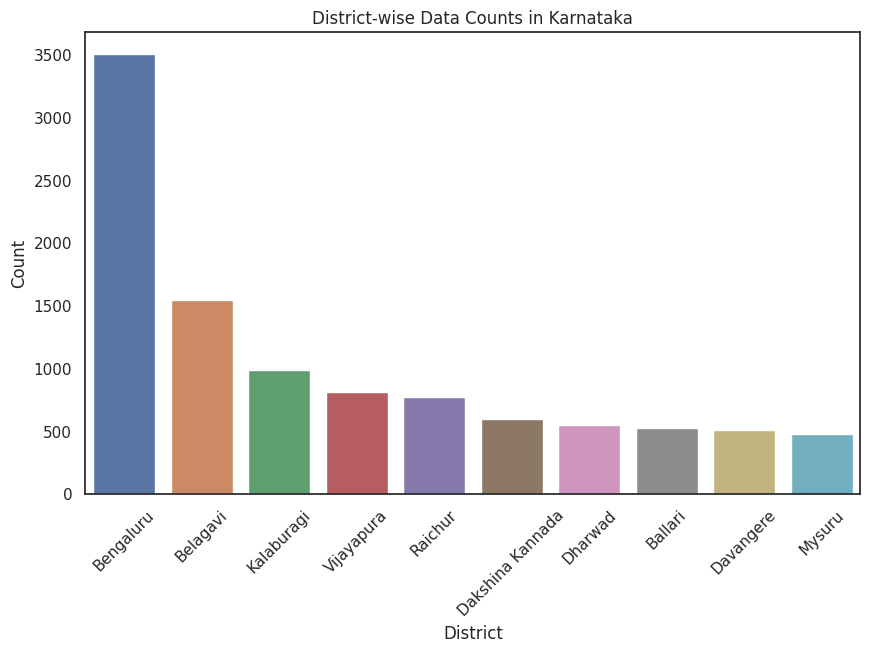

0.3635876178741455


In [ ]:
start_time=time.time()
district_counts = karnataka_data['District'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=district_counts.index, y=district_counts.values)
plt.title('District-wise Data Counts in Karnataka')
plt.xlabel('District')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

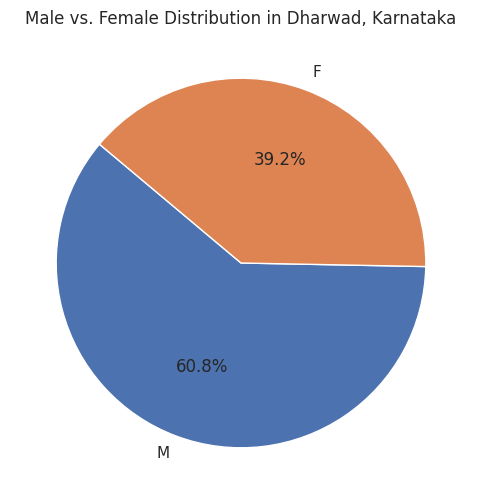

0.1853165626525879


In [ ]:
start_time=time.time()
dharwad_data = df[(df['State'] == 'Karnataka') & (df['District'] == 'Dharwad')]


gender_counts = dharwad_data['Gender'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Male vs. Female Distribution in Dharwad, Karnataka')
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)


In [ ]:
enrolment_agency_counts = df['Enrolment Agency'].value_counts().head(10)

print("Enrolment Agency Counts:")
print(enrolment_agency_counts)

Enrolment Agency Counts:
CSC SPV                                     100357
SRM Education And Social Welfare Society     18101
SREI INFRASTRUCTURE FINANCES L               16972
Rajcomp Info Services Ltd                    12910
AKSH OPTIFIBRE LIMITED                       12580
TAMILNADU ARASU CABLE TV CORPORATION LTD     12114
Akshaya                                      11937
MPOnline Limited                             10808
CMS Computers Ltd                             9229
IAP COMPANY Pvt. Ltd                          7537
Name: Enrolment Agency, dtype: int64


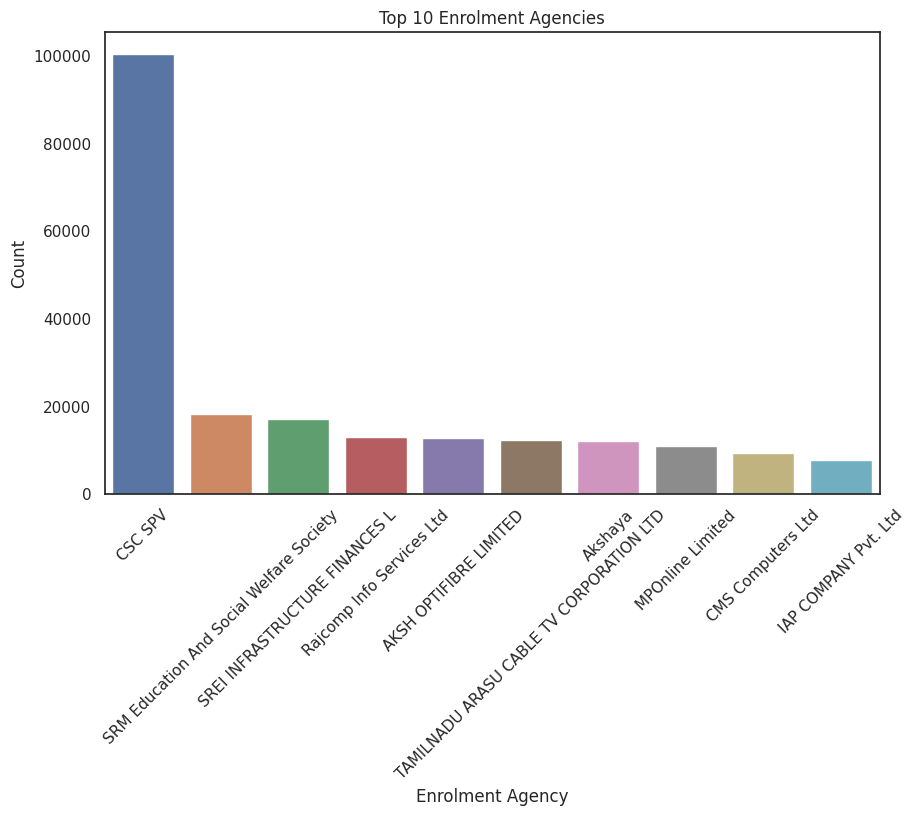

0.41395998001098633


In [ ]:
start_time=time.time()
enrolment_agency_counts = df['Enrolment Agency'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=enrolment_agency_counts.index, y=enrolment_agency_counts.values)
plt.title('Top 10 Enrolment Agencies')
plt.xlabel('Enrolment Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

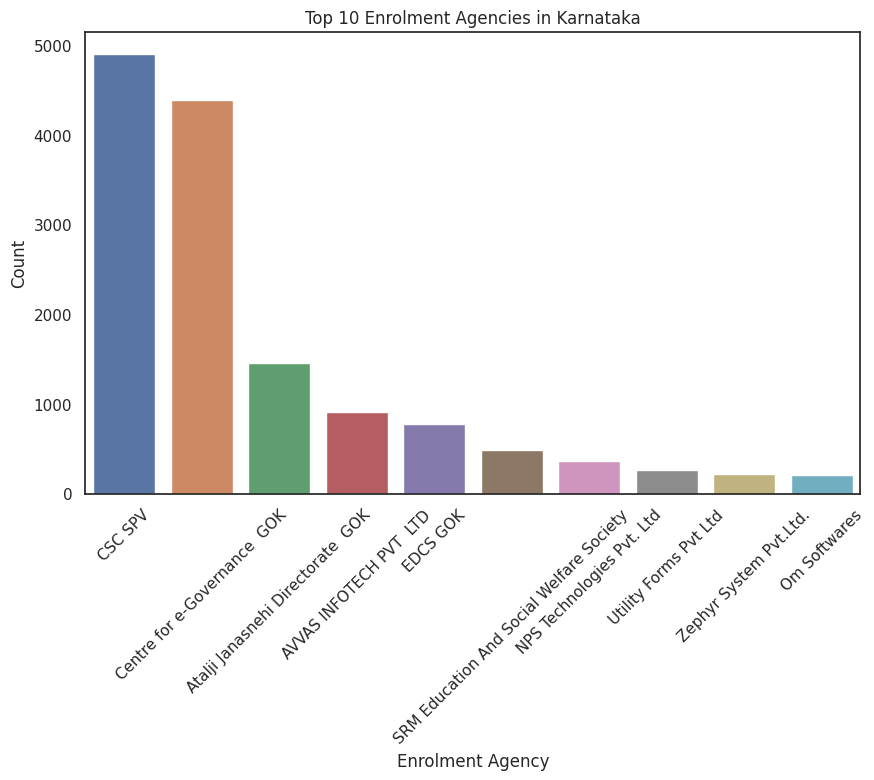

0.4102609157562256


In [ ]:
start_time=time.time()
karnataka_data = df[df['State'] == 'Karnataka']
enrolment_agency_counts_karnataka = karnataka_data['Enrolment Agency'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=enrolment_agency_counts_karnataka.index, y=enrolment_agency_counts_karnataka.values)
plt.title('Top 10 Enrolment Agencies in Karnataka')
plt.xlabel('Enrolment Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
end_time=time.time()
ep=end_time-start_time
print(ep)

In [ ]:
karnataka_data_count = df[df['State'] == 'Karnataka'].shape[0]

print("Count of data in Karnataka:", karnataka_data_count)

Count of data in Karnataka: 15755
